<a href="https://colab.research.google.com/github/mihir0804/TATA_Vertual_Internship/blob/main/TATA_Vertual_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Scikit Learn Libraries for Machine Learning Model Building
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.cluster import KMeans



In [33]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail (1).xlsx


In [37]:
import pandas as pd

# Read the uploaded Excel file (should match exact name)
df = pd.read_excel('/content/Online Retail (1).xlsx', engine='openpyxl')

# Clean the data
df.dropna(subset=['CustomerID'], inplace=True)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Preview the cleaned data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [38]:
# Filter for one country to reduce noise (e.g., United Kingdom)
basket = df[df['Country'] == "United Kingdom"].pivot_table(
    index='InvoiceNo',
    columns='Description',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

# Convert quantities to 1 (purchased) or 0 (not purchased)
basket_binary = basket.applymap(lambda x: 1 if x > 0 else 0)

In [39]:
# Filter for UK data
basket = df[df['Country'] == "United Kingdom"].pivot_table(
    index='InvoiceNo',
    columns='Description',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

# Convert to boolean
basket_binary = basket > 0

# Run Apriori
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(basket_binary, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)

rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
335,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM ),0.014504,0.013094,0.010525,0.725694,55.423518,1.0,0.010335,3.597836,0.996409,0.616519,0.722055,0.764770
334,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.013094,0.014504,0.010525,0.803846,55.423518,1.0,0.010335,5.024099,0.994985,0.616519,0.800959,0.764770
31,(BLUE HAPPY BIRTHDAY BUNTING),(PINK HAPPY BIRTHDAY BUNTING),0.015259,0.015763,0.010928,0.716172,45.434568,1.0,0.010688,3.467720,0.993145,0.543860,0.711626,0.704731
30,(PINK HAPPY BIRTHDAY BUNTING),(BLUE HAPPY BIRTHDAY BUNTING),0.015763,0.015259,0.010928,0.693291,45.434568,1.0,0.010688,3.210666,0.993653,0.543860,0.688538,0.704731
357,(SMALL DOLLY MIX DESIGN ORANGE BOWL),(SMALL MARSHMALLOWS PINK BOWL),0.017324,0.013648,0.010626,0.613372,44.943652,1.0,0.010390,2.551167,0.994987,0.522277,0.608023,0.695985
356,(SMALL MARSHMALLOWS PINK BOWL),(SMALL DOLLY MIX DESIGN ORANGE BOWL),0.013648,0.017324,0.010626,0.778598,44.943652,1.0,0.010390,4.438421,0.991278,0.522277,0.774695,0.695985
369,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.012489,0.020194,0.010475,0.838710,41.531816,1.0,0.010223,6.074795,0.988265,0.471655,0.835385,0.678706
368,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.020194,0.012489,0.010475,0.518703,41.531816,1.0,0.010223,2.051771,0.996036,0.471655,0.512616,0.678706
29,(TOILET METAL SIGN),(BATHROOM METAL SIGN),0.014756,0.018684,0.011130,0.754266,40.370523,1.0,0.010854,3.993413,0.989835,0.498871,0.749588,0.674977
28,(BATHROOM METAL SIGN),(TOILET METAL SIGN),0.018684,0.014756,0.011130,0.595687,40.370523,1.0,0.010854,2.436838,0.993797,0.498871,0.589632,0.674977


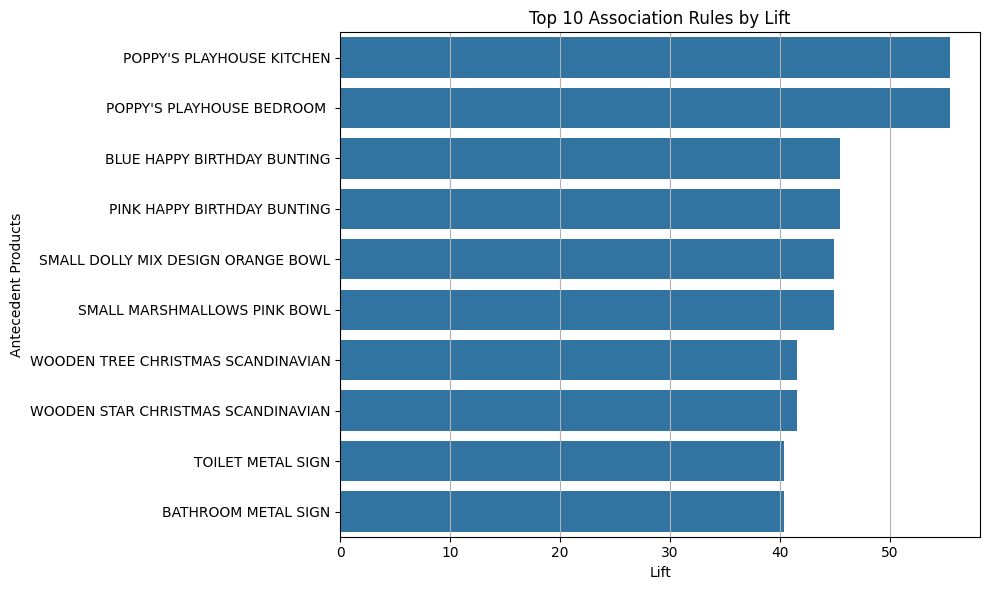

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take top 10 rules sorted by lift
top_rules = rules.sort_values('lift', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].apply(lambda x: ', '.join(list(x))))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Antecedent Products')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

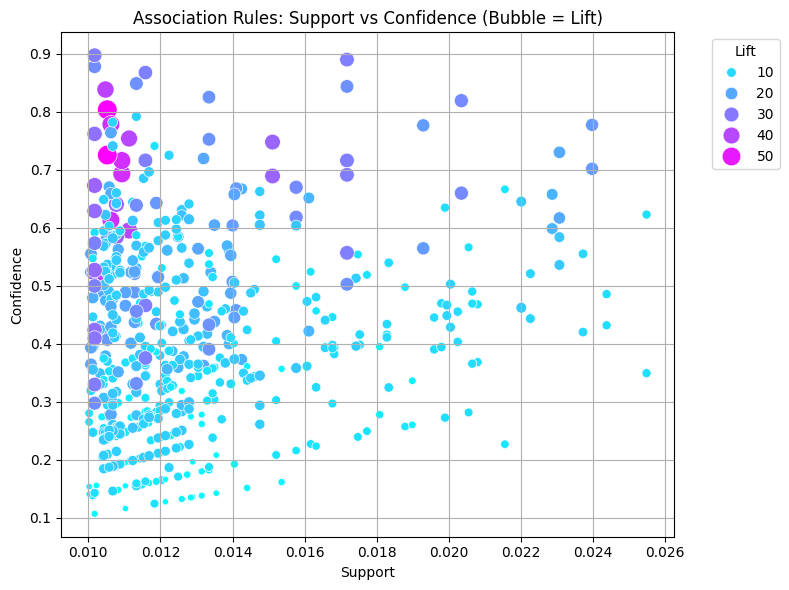

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='cool', sizes=(20, 200))
plt.title('Association Rules: Support vs Confidence (Bubble = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Convert frozensets to strings for saving
rules_export = rules.copy()
rules_export['antecedents'] = rules_export['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_export['consequents'] = rules_export['consequents'].apply(lambda x: ', '.join(list(x)))

# Export
rules_export.to_csv('association_rules.csv', index=False)

# Download from Colab
from google.colab import files
files.download('association_rules.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>